In [2]:
import pandas as pd
import numpy as np

In [4]:
df_college_students = pd.read_csv("college_student_placement_dataset.csv")
df_ds_salary        = pd.read_csv("data_scientists_salaries_from_reddit.csv")
df_detailed         = pd.read_csv("detailed_data.csv")
df_startup_funding  = pd.read_csv("hack_startup_funding.csv")
df_indian_students  = pd.read_csv("indian_student_placement_data.csv")
df_job_placement    = pd.read_csv("job_placement.csv")
df_placement_basic  = pd.read_csv("Placement.csv")
df_companies        = pd.read_csv("placement_companies.csv")
df_placementdata    = pd.read_csv("placementdata.csv")
df_region_mumbai    = pd.read_csv("region_mumbai.csv")


In [5]:
datasets = {
    "college_students": df_college_students,
    "ds_salary": df_ds_salary,
    "detailed_data": df_detailed,
    "startup_funding": df_startup_funding,
    "indian_students": df_indian_students,
    "job_placement": df_job_placement,
    "placement_basic": df_placement_basic,
    "placement_companies": df_companies,
    "placementdata": df_placementdata,
    "region_mumbai": df_region_mumbai
}


In [6]:
for name, df in datasets.items():
    print(f"{name}: {df.shape}")


college_students: (10000, 10)
ds_salary: (555, 14)
detailed_data: (462, 5)
startup_funding: (2372, 10)
indian_students: (1000, 10)
job_placement: (700, 11)
placement_basic: (1000, 5)
placement_companies: (3098, 5)
placementdata: (10000, 12)
region_mumbai: (1584, 5)


In [7]:
for name, df in datasets.items():
    print(f"\n{name} columns:")
    print(df.columns.tolist())



college_students columns:
['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Internship_Experience', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed', 'Placement']

ds_salary columns:
['date', 'title', 'location', 'salary', 'company_industry', 'education', 'prior_experience', 'bonus', 'stocks', 'total_comp', 'additional_benefits', 'tenure_length_period', 'tenure_length_period_units', 'survey_year']

detailed_data columns:
['name of company', 'college name', 'region', 'year', 'Salary']

startup_funding columns:
['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks']

indian_students columns:
['Name', 'Email', 'Course', 'Branch', 'Graduation Year', 'Company', 'Job Role', 'Salary (INR)', 'Location', 'Placement Date']

job_placement columns:
['id', 'name', 'gender', 'age', 'degree', 'stream', 'college_name', 'placement_status', 'salary', 'gpa', 'years_of_exper

In [8]:
for name, df in datasets.items():
    print(f"\n{name} dtypes:")
    print(df.dtypes)



college_students dtypes:
College_ID                 object
IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience      object
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
Placement                  object
dtype: object

ds_salary dtypes:
date                           object
title                          object
location                       object
salary                         object
company_industry               object
education                      object
prior_experience               object
bonus                          object
stocks                         object
total_comp                     object
additional_benefits              bool
tenure_length_period          float64
tenure_length_period_units     object
survey_year                     int64
dtype: object

detailed_data dtypes:
name of company    object
colleg

## PLACEMENT DATASETS IDENTIFICATION

Primary placement datasets:

college_students

Target column: Placement (Yes/No)

placement_basic

Target column: Placed

placementdata

Target column: PlacementStatus

job_placement

Target column: placement_status

## SALARY DATASETS IDENTIFICATION
Primary salary datasets:

placement_basic

Target: Salary (INR LPA)

job_placement

Target: salary

indian_students

Target: Salary (INR)

ds_salary

Target: salary / total_comp

## SUPPORTING DATASETS
detailed_data

College–company–region–salary mapping

placement_companies

Company recurrence & college relations

region_mumbai

Region-wise placement analysis

startup_funding

Future phase: startup success prediction

## COLUMN TYPE ANALYSIS
Numerical columns:

CGPA, IQ, salary, marks, experience

Categorical columns:

gender, degree, stream, region, company

Text-heavy columns (need processing later):

salary (ds_salary)

AmountInUSD (startup_funding)

## POTENTIAL DATA ISSUES OBSERVED
Salary stored as text in ds_salary and startup_funding

Multiple datasets use different placement labels

Possible class imbalance in placement datasets

Different salary units (INR, LPA, USD)

## Placement Distribution Plot

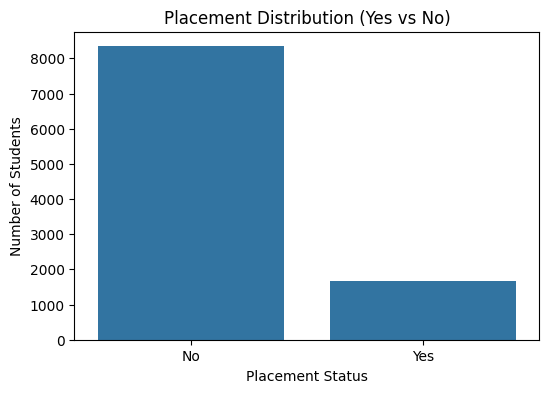

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# choose one placement dataset (college_students)
df = df_college_students

plt.figure(figsize=(6,4))
sns.countplot(x='Placement', data=df)
plt.title("Placement Distribution (Yes vs No)")
plt.xlabel("Placement Status")
plt.ylabel("Number of Students")
plt.show()


### Gender Distribution Plot

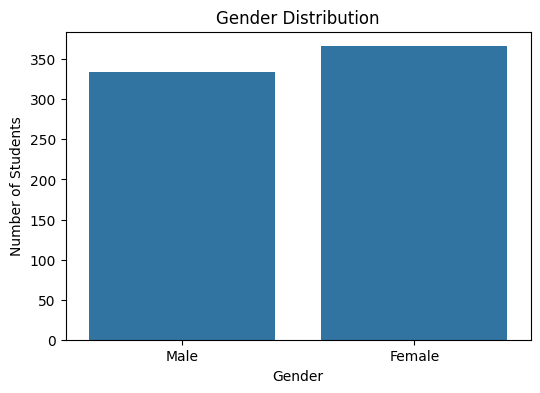

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df_job_placement)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.show()


### Salary Distribution (Histogram)

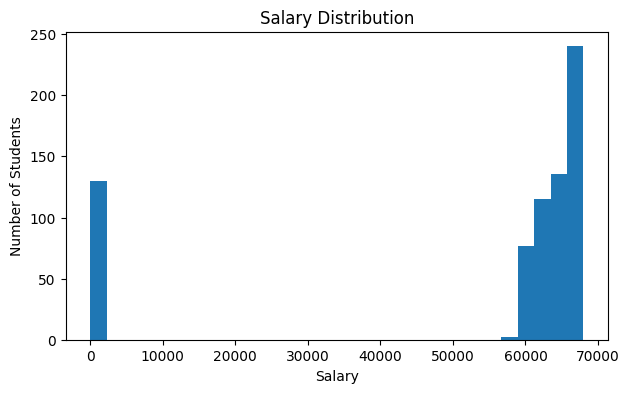

In [11]:
plt.figure(figsize=(7,4))
plt.hist(df_job_placement['salary'], bins=30)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Number of Students")
plt.show()


### CGPA vs Placement (Relationship Plot)

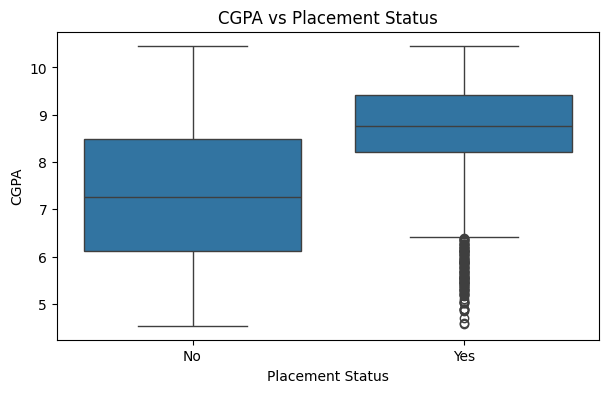

In [12]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Placement', y='CGPA', data=df_college_students)
plt.title("CGPA vs Placement Status")
plt.xlabel("Placement Status")
plt.ylabel("CGPA")
plt.show()


### Experience vs Salary

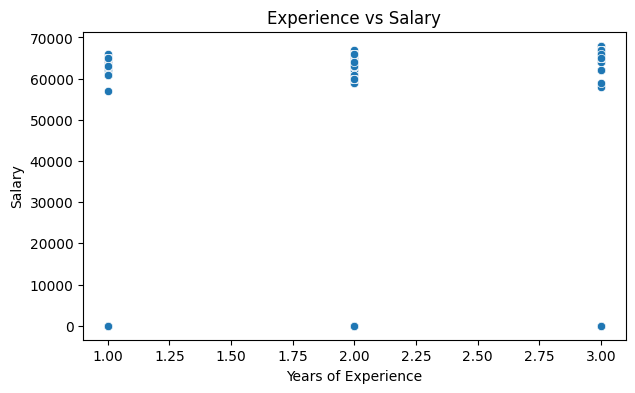

In [13]:
plt.figure(figsize=(7,4))
sns.scatterplot(
    x='years_of_experience',
    y='salary',
    data=df_job_placement
)
plt.title("Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


- Placement data is highly imbalanced.
- Salary distribution is skewed with zero-value outliers.
- CGPA has a strong positive relationship with placement.
- Experience shows a positive trend with salary.
- Multiple features are required for reliable prediction.